# challenge part 2

## outliers and missing values

Here you have 3 dataframes that need cleaning.
Use the methods learned in class to process the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import warnings
# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import seaborn as sns
sns.set(style="ticks", font_scale=1.5)  # white graphs, with large and legible letters

# %matplotlib widget

In [2]:
df1 = pd.read_csv('cleaning1.csv', 
                  index_col='date',     # set the column date as index 
                  parse_dates=True)     # turn to datetime format
df1

,A,B,C,D,E
date,,,,,
2023-01-01 00:00:00,0,0.000000,0.000000,0.000000,0.000000
2023-01-01 00:05:00,1,2.245251,-1.757193,1.899602,-0.999300
2023-01-01 00:10:00,2,2.909648,0.854732,2.050146,-0.559504
2023-01-01 00:15:00,3,3.483155,0.946937,1.921080,-0.402084
2023-01-01 00:20:00,2,4.909169,0.462239,1.368470,-0.698579
...,...,...,...,...,...
2023-12-31 23:35:00,-37,1040.909898,-14808.285199,1505.020266,423.595984
2023-12-31 23:40:00,-36,1040.586547,-14808.874072,1503.915566,423.117110
2023-12-31 23:45:00,-37,1042.937417,-14808.690745,1505.479671,423.862810


In [3]:
df2 = pd.read_csv('cleaning2_formated.csv', 
                  index_col='datetime',     # set the column date as index 
                  parse_dates=True)     # turn to datetime format
df2

,A,B
datetime,,
2023-01-01 00:00:00,0.000000,0.000000
2023-01-01 01:00:00,-2.027536,0.011985
2023-01-01 02:00:00,-2.690617,-0.297928
2023-01-01 03:00:00,-1.985990,-0.309409
2023-01-01 04:00:00,-2.290898,-2.866663
...,...,...
2023-12-31 19:00:00,-74.514645,293.868086
2023-12-31 20:00:00,-74.738058,294.759346
2023-12-31 21:00:00,-75.848425,294.076349


In [4]:
df3 = pd.read_csv('cleaning3_formated.csv', 
                  index_col='time',     # set the column date as index 
                  parse_dates=True,     # turn to datetime format
                )
df3

,A
time,
2023-01-01,0.000000
2023-01-02,-0.032027
2023-01-03,-0.586351
2023-01-04,-1.575972
2023-01-05,-2.726800
...,...
2023-12-27,6.651301
2023-12-28,6.415175
2023-12-29,7.603140


## cleaning df1 from outliers
### method 1: rolling standard deviation envelope
Visual inspection of all the data:

In [5]:
def plot_all_columns(data):
    column_list = data.columns
    
    fig, ax = plt.subplots(len(column_list),1, sharex=True, figsize=(10,len(column_list)*2))

    if len(column_list) == 1:
        ax.plot(data[column_list[0]])
        return
    for i, column in enumerate(column_list):
        ax[i].plot(data[column])
        ax[i].set(ylabel=column)
    
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
    formatter = mdates.ConciseDateFormatter(locator)
    ax[i].xaxis.set_major_locator(locator)
    ax[i].xaxis.set_major_formatter(formatter)

    return

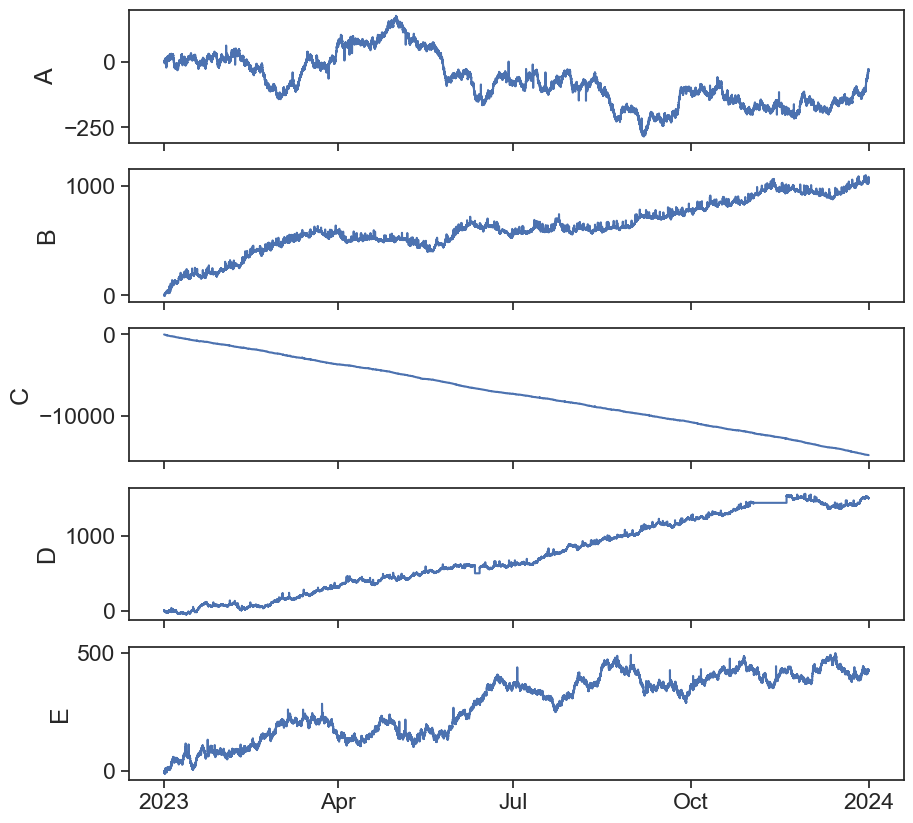

In [6]:
plot_all_columns(df1)

Applying the rolling `std` method on column A:

In [7]:
# find the rolling std
df1['A_std'] = df1['A'].rolling(50, center=True, min_periods=1).std()
# find the rolling mean
df1['A_mean'] = df1['A'].rolling(50, center=True, min_periods=1).mean()
# define the k parameter -> the number of standard deviations from the mean which above them we classify as outliar
k = 2
# finding the top and bottom threshold for each datapoint
df1['A_top'] = df1['A_mean'] + k*df1['A_std']
df1['A_bot'] = df1['A_mean'] - k*df1['A_std']
# creating a mask of booleans that places true if the row is an outliar and false if its not.
df1['A_out'] = ((df1['A'] > df1['A_top']) | (df1['A'] < df1['A_bot']))
# applying the mask and replacing all outliers with nans.
df1['A_filtered'] = np.where(df1['A_out'],
                                np.nan,  # use this if A_out is True
                                df1['A']) # otherwise
df1
                            

,A,B,C,D,E,A_std,A_mean,A_top,A_bot,A_out,A_filtered
date,,,,,,,,,,,
2023-01-01 00:00:00,0,0.000000,0.000000,0.000000,0.000000,1.262273,1.520000,4.044546,-1.004546,False,0.0
2023-01-01 00:05:00,1,2.245251,-1.757193,1.899602,-0.999300,1.331858,1.423077,4.086793,-1.240639,False,1.0
2023-01-01 00:10:00,2,2.909648,0.854732,2.050146,-0.559504,1.462738,1.296296,4.221771,-1.629179,False,2.0
2023-01-01 00:15:00,3,3.483155,0.946937,1.921080,-0.402084,1.649114,1.142857,4.441085,-2.155371,False,3.0
2023-01-01 00:20:00,2,4.909169,0.462239,1.368470,-0.698579,1.880022,0.965517,4.725561,-2.794527,False,2.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 23:35:00,-37,1040.909898,-14808.285199,1505.020266,423.595984,2.988291,-32.633333,-26.656751,-38.609916,False,-37.0
2023-12-31 23:40:00,-36,1040.586547,-14808.874072,1503.915566,423.117110,3.038748,-32.655172,-26.577676,-38.732669,False,-36.0
2023-12-31 23:45:00,-37,1042.937417,-14808.690745,1505.479671,423.862810,3.077483,-32.714286,-26.559320,-38.869251,False,-37.0


### ploting the results:
Use `%matplotlib widget` to visualy inspect the results.

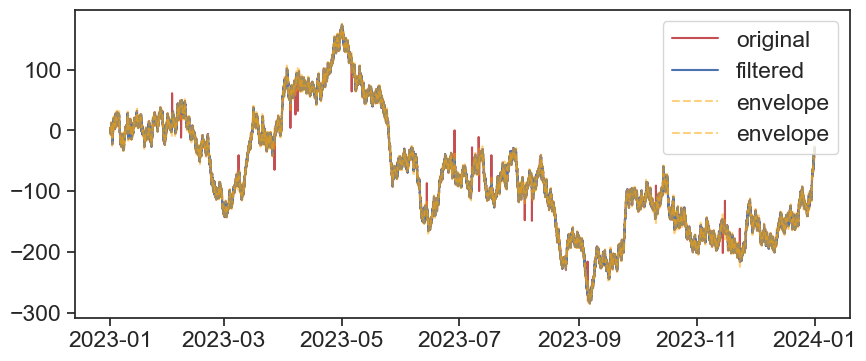

In [8]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(df1['A'], c='r', label='original')
ax.plot(df1['A_filtered'], c='b', label='filtered')
ax.plot(df1['A_bot'], c='orange',linestyle='--', label='envelope', alpha=0.5)
ax.plot(df1['A_top'], c='orange',linestyle='--', label='envelope', alpha=0.5)

ax.legend()

Now let's write a function so we can easly apply it to all our data:

In [9]:
def rolling_std_envelop(series, window_size=50, k=2):
    series.name = 'original'
    data = series.to_frame()
    data['std'] = data['original'].rolling(window_size, center=True, min_periods=1).std()
    # find the rolling mean
    data['mean'] = data['original'].rolling(window_size, center=True, min_periods=1).mean()
    # finding the top and bottom threshold for each datapoint
    data['top'] = data['mean'] + k*data['std']
    data['bottom'] = data['mean'] - k*data['std']
    # creating a mask of booleans that places true if the row is an outliar and false if its not.
    data['outliers'] = ((data['original'] > data['top']) | (data['original'] < data['bottom']))
    # applying the mask and replacing all outliers with nans.
    data['filtered'] = np.where(data['outliers'],
                                np.nan,  # use this if outliers is True
                                data['original']) # otherwise
    return data['filtered']

Let's test the new function:

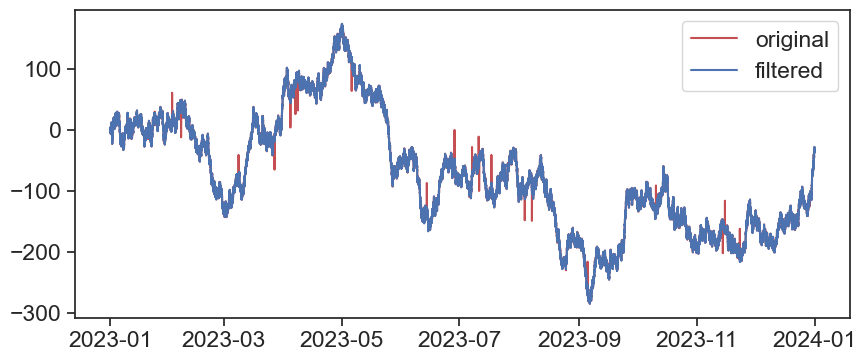

In [10]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(df1['A'], c='r', label='original')
ax.plot(rolling_std_envelop(df1['A']), c='b', label='filtered')
ax.legend()

Now let's reload `df1` so it will be clean (without all the added columns from before) and apply the function on all columns:

In [11]:
df1 = pd.read_csv('cleaning1.csv', 
                  index_col='date',     # set the column date as index 
                  parse_dates=True)     # turn to datetime format

In [12]:
df1_filtered = df1.copy()
df1_filtered

,A,B,C,D,E
date,,,,,
2023-01-01 00:00:00,0,0.000000,0.000000,0.000000,0.000000
2023-01-01 00:05:00,1,2.245251,-1.757193,1.899602,-0.999300
2023-01-01 00:10:00,2,2.909648,0.854732,2.050146,-0.559504
2023-01-01 00:15:00,3,3.483155,0.946937,1.921080,-0.402084
2023-01-01 00:20:00,2,4.909169,0.462239,1.368470,-0.698579
...,...,...,...,...,...
2023-12-31 23:35:00,-37,1040.909898,-14808.285199,1505.020266,423.595984
2023-12-31 23:40:00,-36,1040.586547,-14808.874072,1503.915566,423.117110
2023-12-31 23:45:00,-37,1042.937417,-14808.690745,1505.479671,423.862810


In [13]:
columns = df1_filtered.columns

for column in columns:
    filtered_column = rolling_std_envelop(df1_filtered[column], window_size=50, k=2)
    df1_filtered[column] = filtered_column

Now let's plot the results:

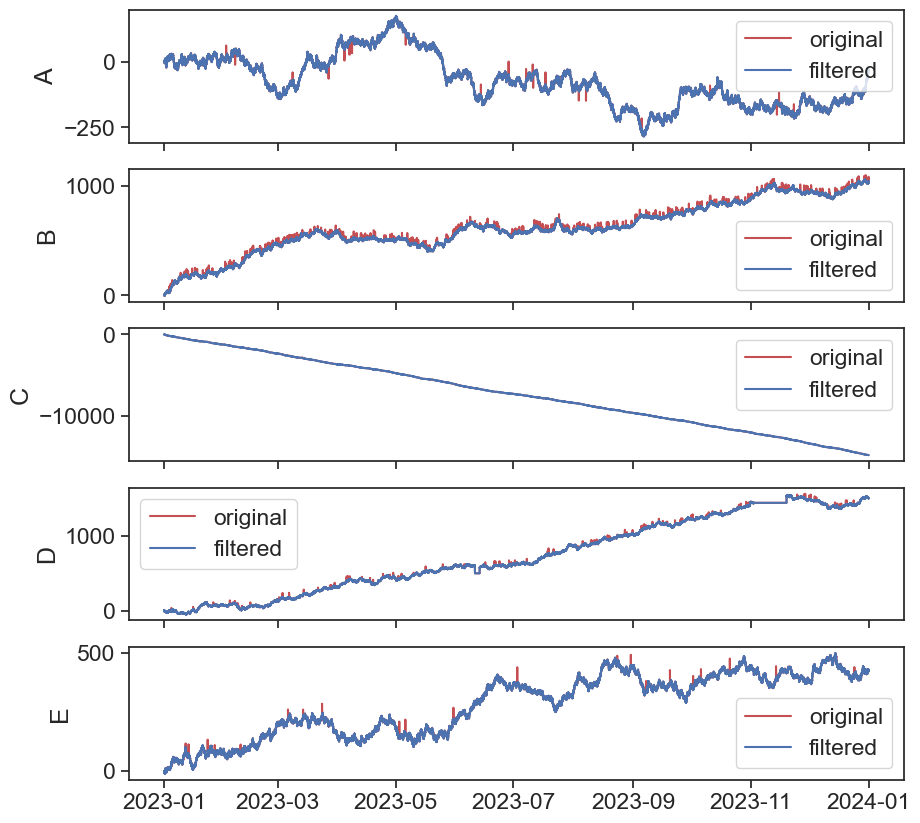

In [14]:
fig, ax = plt.subplots(len(columns),1, sharex=True, figsize=(10,len(columns)*2))

for i, column in enumerate(columns):
    ax[i].plot(df1[column], c='r', label='original')
    ax[i].plot(df1_filtered[column], c='b', label='filtered')
    ax[i].legend()
    ax[i].set(ylabel=column)

## plateaus
Now what about the plateaus in the series D?  
That's another form of outliers.  
The following function will find rows wich have more than `n` equal following values and replace them with NaNs.

In [15]:
# function to copy paste:
def conseq_series(series, N):
    """
    part A:
    1. assume a string of 5 equal values. that's what we want to identify
    2. diff produces a string of only 4 consecutive zeros
    3. no problem, because when applying cumsum, the 4 zeros turn into a plateau of 5, that's what we want
    so far, so good
    part B:
    1. groupby value_grp splits data into groups according to cumsum.
    2. because cumsum is monotonically increasing, necessarily all groups will be composed of neighboring rows, no funny business
    3. what are those groups made of? of rows of column 'series'. this specific column is not too important, because:
    4. count 'counts' the number of elements inside each group.
    5. the real magic here is that 'transform' assigns each row of the original group with the count result.
    6. finally, we can ask the question: which rows belong to a string of identical values greater-equal than some threshold.
    zehu, you now have a mask (True-False) with the same shape as the original series.

    """
    # part A:
    sumsum_series = (
                   (series.diff() != 0)         # diff zero becomes false, otherwise true
                      .astype('int')           # true -> 1  , false -> 0
                      .cumsum()                # cumulative sum, monotonically increasing
                  )
    # part B:
    mask_outliers = (
                    series.groupby(sumsum_series)           # take original series and group it by values of cumsum
                                .transform('count')        # now count how many are in each group, assign result to each existing row. that's what transform does
                                .ge(N)                    # if row count >= than user-defined n_consecutives, assign True, otherwise False
                    )
    
    # apply mask:
    result = pd.Series(np.where(mask_outliers,
                                np.nan,  # use this if mask_outliers is True
                                series), # otherwise
                            index=series.index)
    return result

Let's apply it to the `df1_filtered` df so we will end with a cleaner signal

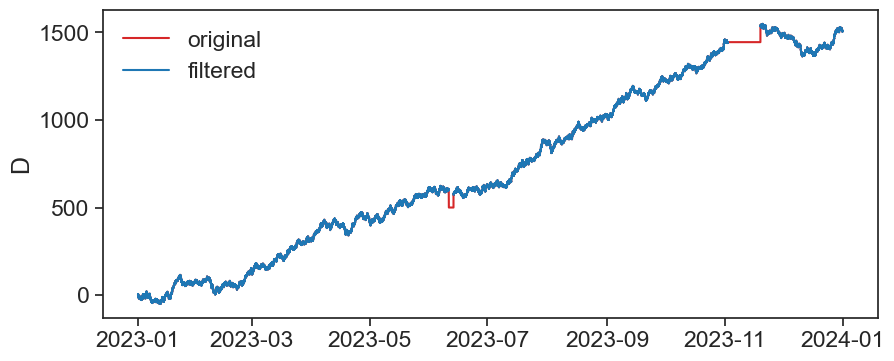

In [16]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(df1_filtered['D'], color="tab:red", label='original')
ax.plot(conseq_series(df1_filtered['D'], 10), c='tab:blue', label='filtered')
ax.set_ylabel('D')
ax.legend(frameon=False)

### TO DO:

**it's not homework but you should definitely do it**

* Try other filtering methods
* Tweak the parameters
* Use other dataframes (1,2,3 and if you have your own so better)
* Write custom filtering functions that you can save and use in your future work.

**Yalla have fun**